<a href="https://colab.research.google.com/github/Ruiyang1210W/ITC-2025-LoopBreakers/blob/main/ITC2025_LoopBreakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
The Itty-Bitty Electric Company (IBEC) provides electric service to a large service territory in Southern California. To ensure ongoing system reliability it is imperative that they focus their budget and their efforts on the right areas for system maintenance and upgrades. Additionally, they are required to
provide justification for those expenditures in their rate case.

# Problem Statement
An important measure of system reliability is Customer Minutes of Interruption (CMI). CMI is determined by the number and duration of outages and the number of customers affected by those outages. To reduce CMI, IBEC desires to reduce the number of unplanned outages as well as their duration through system upgrades. Determining where to make those upgrades is the key decision.
While IBEC has internal data which identifies outages on individual circuits and their impact, they do not feel that they have the internal resources with the necessary skills in current analytics technologies such
as artificial intelligence and machine learning

# Data Description
The dataset contains information related to electric circuit outages and circuit characteristics for the Itty-Bitty Electric Company (IBEC).

# Data Dictionary
* Circuit Number: Unique ID representing a specific circuit

* Circuit Name: Name of the circuit (e.g., Orange, Alabama)

* Outage Date: Date when the outage occurred

* Outage CauseCode: Numerical code representing the cause of the outage

* Outage Cause: Text description of the cause of the outage (e.g., Weather, Animal, Equipment Failure)

* Outage Duration (min): Duration of the outage in minutes

* Customers Affected: Number of customers affected during the outage

* Circuit Number: Unique ID matching the circuit in the outage data

* Circuit Name: Name of the circuit

* KV: Voltage level of the circuit

* Region: Geographic region where the circuit is located (e.g., Coastal, North, Desert)

* Customer Count: Total number of customers served by the circuit

* Circuit Miles: Length of the circuit in miles

* % Overhead: Percentage of the circuit that runs overhead

* % Underground: Percentage of the circuit that is underground

* 2023 SAIDI: System Average Interruption Duration Index for the year 2023

* 2023 SAIFI: System Average Interruption Frequency Index for the year 2023



## Import libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the file
file_path = '/content/drive/MyDrive/ITC2025/DataAnalytics2025.xlsx'
# Load Circuit Outage
df_outage = pd.read_excel(file_path, sheet_name='Circuit Outage')
# Load LookUp
df_lookup = pd.read_excel(file_path, sheet_name='LookUp')

### Circuit Outage sheet

In [ ]:
# Read the data (outage)
df_outage.head()

,Circuit Number,Circuit Name,Outage Date,Outage CauseCode,Outage Cause,Outage Duration (min),Customers Affected,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Orange,2024-01-05,8,Other,837,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Orange,2024-08-27,3,Weather,515,1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Orange,2024-11-10,4,Third Party,1169,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop all unnamed columns
df_outage.drop(df_outage.columns[df_outage.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Drop unnecessary column: Outage CauseCode
df_outage.drop('Outage CauseCode', axis=1, inplace=True)

Observations: Outage has 7 columns

In [ ]:
# Summary of the outage
df_outage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Circuit Number         100 non-null    int64         
 1   Circuit Name           100 non-null    object        
 2   Outage Date            100 non-null    datetime64[ns]
 3   Outage Cause           100 non-null    object        
 4   Outage Duration (min)  100 non-null    int64         
 5   Customers Affected     100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
# Check missing values
df_outage.isnull().sum()

,0
Circuit Number,0
Circuit Name,0
Outage Date,0
Outage Cause,0
Outage Duration (min),0
Customers Affected,0


Obsevations: There are no missing values.

In [ ]:
# Check the statistical summary of the data: Outage
df_outage.describe()

,Circuit Number,Outage Date,Outage Duration (min),Customers Affected
count,100.000000,100,100.000000,100.000000
mean,10.980000,2024-06-16 03:36:00,754.980000,1069.710000
min,1.000000,2024-01-02 00:00:00,19.000000,31.000000
25%,6.000000,2024-04-02 12:00:00,410.750000,427.250000
50%,11.000000,2024-05-28 12:00:00,779.000000,973.000000
75%,17.000000,2024-08-24 18:00:00,1168.250000,1602.000000
max,21.000000,2024-12-28 00:00:00,1424.000000,3249.000000
std,6.006697,NaN,419.476369,787.163855


### LookUp Sheet

In [ ]:
# Read the data (lookup)
df_lookup.head()

,Circuit Number,Circuit Name,KV,Region,Customer Count,Circuit Miles,% Overhead,% Underground,2023 SAIDI,2023 SAIFI,Unnamed: 10,Outage Cause Code,Outage Cause
0,1,Orange,4,Coastal,1299,45,90,10,1.68,0.002,NaN,1.0,UG Equipment Failure
1,2,Alabama,12,North,3447,29,82,18,0.57,0.001,NaN,2.0,Vegetation
2,3,Green,12,Coastal,2701,26,55,45,2.40,0.002,NaN,3.0,Weather
3,4,Oregon,16,Desert,1147,101,85,15,1.39,0.002,NaN,4.0,Third Party
4,5,Yellow,4,North,1706,43,85,15,2.20,0.005,NaN,5.0,Animal


In [ ]:
# Drop all unnamed columns
df_lookup.drop(df_lookup.columns[df_lookup.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Drop unnecessary columns: Outage Cause Code and Outage Cause (Handled in the other sheet)
df_lookup.drop(['Outage Cause Code', 'Outage Cause'], axis=1, inplace=True)

In [ ]:
# Summary of the Lookup
df_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Circuit Number  21 non-null     int64  
 1   Circuit Name    21 non-null     object 
 2   KV              21 non-null     int64  
 3   Region          21 non-null     object 
 4   Customer Count  21 non-null     int64  
 5   Circuit Miles   21 non-null     int64  
 6   % Overhead      21 non-null     int64  
 7   % Underground   21 non-null     int64  
 8   2023 SAIDI      21 non-null     float64
 9   2023 SAIFI      21 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ KB


In [ ]:
# Check missing values
df_lookup.isnull().sum()

,0
Circuit Number,0
Circuit Name,0
KV,0
Region,0
Customer Count,0
Circuit Miles,0
% Overhead,0
% Underground,0
2023 SAIDI,0
2023 SAIFI,0


Observation: No missing values

In [ ]:
# # Check the statistical summary of the data: Lookup
df_lookup.describe()

,Circuit Number,KV,Customer Count,Circuit Miles,% Overhead,% Underground,2023 SAIDI,2023 SAIFI
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,11.809524,2158.142857,60.666667,70.761905,29.238095,2.124286,0.002667
std,6.204837,4.812682,990.421288,37.225439,18.811977,18.811977,2.781416,0.002595
min,1.000000,4.000000,441.000000,11.000000,18.000000,10.000000,0.020000,0.001000
25%,6.000000,12.000000,1414.000000,32.000000,60.000000,15.000000,0.910000,0.001000
50%,11.000000,12.000000,2367.000000,45.000000,75.000000,25.000000,1.730000,0.002000
75%,16.000000,16.000000,2701.000000,95.000000,85.000000,40.000000,2.180000,0.003000
max,21.000000,16.000000,3945.000000,129.000000,90.000000,82.000000,13.650000,0.012000


# Feature Engineering

In [ ]:
# Creat a CMI column. CMI is Customer Minutes of Interruption
df_outage['CMI'] = df_outage['Outage Duration (min)'] * df_outage['Customers Affected']

# Summary group by Circuit Number
circuit_summary = df_outage.groupby('Circuit Number').agg({
    'Outage Duration (min)': ['count', 'sum', 'mean'],
    'Customers Affected': ['sum','mean'],
    'CMI': 'sum'
}).reset_index()

# Rename columns
circuit_summary.columns = [
    'Circuit Number', 'Total Outages', 'Total Duration', 'Avg Duration',
    'Total Customers Affected', 'Avg Customers Affected', 'Total CMI'
]

circuit_summary.head()

,Circuit Number,Total Outages,Total Duration,Avg Duration,Total Customers Affected,Avg Customers Affected,Total CMI
0,1,3,2521,840.333333,2537,845.666667,1991375
1,2,4,2073,518.250000,9860,2465.000000,5672058
2,3,6,5514,919.000000,10099,1683.166667,8412718
3,4,4,1883,470.750000,1891,472.750000,545548
4,5,7,4901,700.142857,5227,746.714286,3137676


In [ ]:
# Summary of total impact by Outage Cause (Use this for charts/insight in Power BI)
cause_summary = df_outage.groupby('Outage Cause').agg({
    'Outage Duration (min)': 'sum',
    'Customers Affected': 'sum',
    'CMI': 'sum'
}).reset_index()

cause_summary.columns = [
    'Outage Cause',
    'Total Outage Duration (min)',
    'Total Customers Affected',
    'Total CMI'
]

cause_summary

,Outage Cause,Total Outage Duration (min),Total Customers Affected,Total CMI
0,Animal,6344,8973,7728683
1,OH Equipment Failure,10545,19700,11416505
2,Operation,9608,7643,7137544
3,Other,8053,12734,9010565
4,Third Party,12390,15163,14166551
5,UG Equipment Failure,17782,28895,18783626
6,Vegetation,2260,5377,2229336
7,Weather,8516,8486,5497181


In [ ]:
# Merge the Circuit Outage sheet with LookUp sheet
final_df = pd.merge(circuit_summary, df_lookup, on='Circuit Number', how='left')

In [ ]:
final_df.head()

,Circuit Number,Total Outages,Total Duration,Avg Duration,Total Customers Affected,Avg Customers Affected,Total CMI,Circuit Name,KV,Region,Customer Count,Circuit Miles,% Overhead,% Underground,2023 SAIDI,2023 SAIFI
0,1,3,2521,840.333333,2537,845.666667,1991375,Orange,4,Coastal,1299,45,90,10,1.68,0.002
1,2,4,2073,518.250000,9860,2465.000000,5672058,Alabama,12,North,3447,29,82,18,0.57,0.001
2,3,6,5514,919.000000,10099,1683.166667,8412718,Green,12,Coastal,2701,26,55,45,2.40,0.002
3,4,4,1883,470.750000,1891,472.750000,545548,Oregon,16,Desert,1147,101,85,15,1.39,0.002
4,5,7,4901,700.142857,5227,746.714286,3137676,Yellow,4,North,1706,43,85,15,2.20,0.005


In [33]:
# Machine Learning Model: Predict Total CMI per circuit with Random Forest
# So IBEC can know which circuits are most dangerous and prioritize upgrades.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [34]:
# Select features (x) and target (y)
feature_cols = ['Total Outages','Total Duration', 'Avg Duration', 'Total Customers Affected', 'Avg Customers Affected',
                'KV', 'Customer Count', 'Circuit Miles','% Overhead','% Underground','2023 SAIDI', '2023 SAIFI']
X = final_df[feature_cols]
y = final_df['Total CMI']

Use Random Forest Regressor to predict Total CMI based on features like: Total Outages','Total Duration', 'Avg Duration', 'Total Customers Affected', 'Avg Customers Affected','KV', 'Customer Count', 'Circuit Miles','% Overhead','% Underground','2023 SAIDI', '2023 SAIFI'

In [ ]:
# Split the dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make prediction
y_pred = model.predict(X_test)

compare_df = pd.DataFrame({
    'Actual CMI': y_test.values,
    'Predicted CMI': y_pred
})

print(compare_df.head())

   Actual CMI  Predicted CMI
0     1991375     2190115.34
1      587100     1462115.75
2       86472     1722763.69
3     5672058     6622322.96
4    11931193     7446742.47


In [35]:
# Evalue the model;
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1628952.6539999999
R² Score: 0.7466379256808364


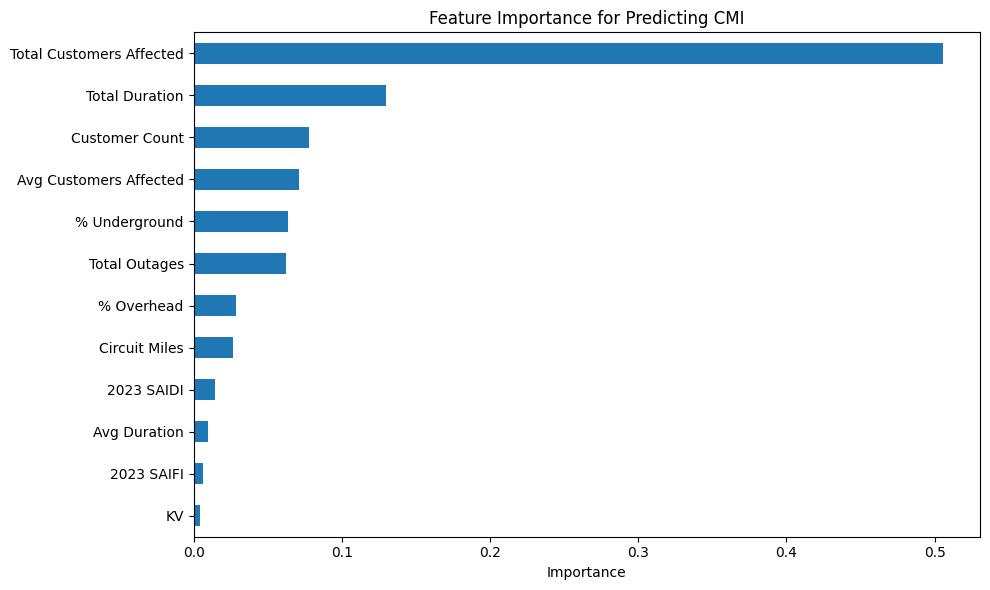

In [32]:
# Visual for the model of what features matther the most
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = pd.Series(importances, index=feature_cols)
features.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance for Predicting CMI')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

- The model learns that the Total Customers Affected is the most important factor in predicting Total CMI. It means Circuits with lots of customers losing power = high CMI risk. Which is because CMI = Outage Duration × Customers Affected.
- This insight reinforces that circuits with large populations and long outages should be prioritized for upgrades.
Other features like reliability indices (SAIDI, SAIFI) and voltage (KV) were found to have relatively low impact on total CMI prediction.

In [48]:
# Identify high risk circuits
final_df['Predicted CMI'] = model.predict(X)
high_risk_df = final_df.sort_values(by='Predicted CMI', ascending=False)

# Pick threshold
threshold = final_df['Predicted CMI'].quantile(0.9)
final_df['High Risk'] = (final_df['Predicted CMI'] >= threshold).astype(int)

high_risk_circuits = final_df[final_df['High Risk'] == 1]

Defined high-risk circuits as those in the top 10% of predicted CMI

Marked those circuits with a new column: High Risk = 1

In [49]:
# Choose relevant columns for display
columns_to_show = [
    'Circuit Number', 'Circuit Name', 'Region',
    'Predicted CMI', 'Total Outages', 'Avg Duration',
    'Total Customers Affected', '% Overhead', '% Underground'
]

print(high_risk_circuits[columns_to_show].sort_values(by='Predicted CMI', ascending=False))


    Circuit Number Circuit Name    Region  Predicted CMI  Total Outages  \
18              19        Logan     North     8886538.68             10   
2                3        Green   Coastal     7585039.06              6   
8                9      Magenta  Mountain     7446742.47             10   

    Avg Duration  Total Customers Affected  % Overhead  % Underground  
18         681.1                     14122          60             40  
2          919.0                     10099          55             45  
8          759.7                     14251          75             25  


Interpretation:
1. Logan
  - Highest predicted CMI
  - Affects 14122 customers
  - Balanced overhead/underground (60% / 40%)
2. Green
  - Slightly fewer outages (6)
  - Very high outage duration (919 mins)
  - Affects 10099 customers
3. Magenta
  - Highest custimer impact (14251)
  - Outage durations are also high (759.7 mins)
  - 75% overhead, which may exposed to weather, vegetation, animal outage causes.